In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
from datetime import datetime



In [2]:
# Lecture des données
path=""
danish=pd.read_csv(path+"danish.csv",sep=",",header=0)

Claims=danish["Claims"]
ClaimTimes=danish["ClaimTimes"]
N=len(Claims)
#print (Claims)

In [3]:
ClaimT=[]

for i in range (N):
    ClaimT += [datetime.strptime(ClaimTimes[i], '%Y-%m-%d %H:%M:%S')]

differences = [t2 - t1 for t1,t2 in zip(ClaimT[:-1], ClaimT[1:])]
Time=[i.days for i in differences]

N_T=np.cumsum(Time)
S= np.cumsum(Claims)

Stocker l'évolution de la fortune dans un vecteur

In [4]:
mu=np.mean(Claims)
lamb=len(N_T)/N_T[-1]


n=500
ti=np.linspace(0,N-3,num=n+1)  ##problème d'indice quand on va au delà de N-3

u=50
c=2
Fortune=[u]
rho=lamb*mu/c
#print(rho)

i=0
for t in ti:
    
    if N_T[int(t)] == N_T[int(t)+1]:
        Fortune+= [Fortune[i]+c]

    else:
        Fortune+= [Fortune[i]-Claims[int(t)]]

    i+=1



#### Calcul des Fdr empiriques


Text(0.5, 1.0, 'Fdr time')

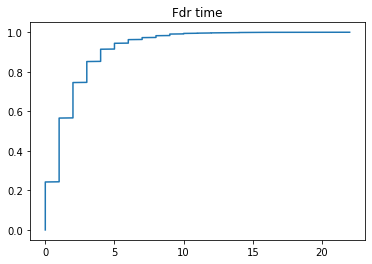

In [8]:
# fdr pour Time (Wt)
X1 = np.sort(Time)
N1=len(Time)
F1 = np.array(range(N1))/float(N1)

plt.plot(X1, F1)
plt.title('Fdr time')



Text(0.5, 1.0, 'Fdr Claims')

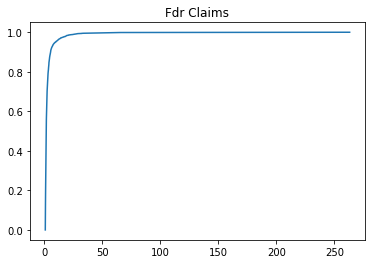

In [7]:
# fdr pour Claims (Xt)

X2 = np.sort(Claims)
N2=len(Claims)
F2 = np.array(range(N2))/float(N2)

plt.plot(X2, F2)

plt.title('Fdr Claims')
